In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


In [2]:
##2.Load the dataset.

df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,index,Exited
0,0,0.7963
1,1,0.2037


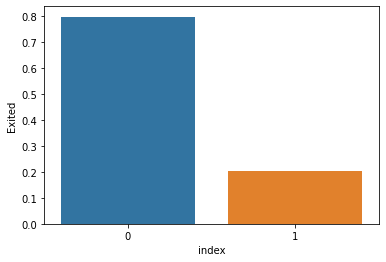

In [8]:
import seaborn as sns
density = df['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=density, x='index', y='Exited', );
density

In [9]:
#the data is significantly imbalanced
import matplotlib.pyplot as plt
categorical = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
rows = int(np.ceil(categorical.shape[1] / 2)) - 1

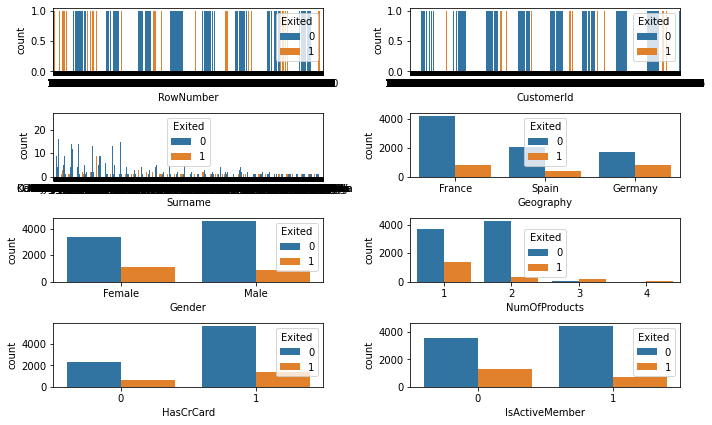

In [10]:
# create sub-plots anf title them
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col]
        ax = axes[row*2 + col]       

        sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax);
        
plt.tight_layout()

In [11]:
#4. Perform descriptive statistics on the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        print("unique of "+i+" is "+str(len(set(df[i])))+" they are "+str(set(df[i])))

unique of Surname is 2932 they are {'Mann', 'Burgoyne', 'Fermin', 'Tsui', 'Hughes-Jones', 'Uren', 'Koger', 'Kornilova', 'Durant', 'Outhwaite', 'Diggs', 'Congreve', 'Macarthur', 'Lockyer', 'Okeke', 'Hodgson', 'Amaechi', 'Timperley', 'Golubev', 'Beyer', 'Stanley', 'Enemuo', 'Dumetochukwu', 'Bunton', 'Chiabuotu', 'Kingsley', 'Lindsay', 'Pagnotto', 'Wollstonecraft', 'Weigel', 'Ives', 'Matveyev', 'Rozhkova', 'Stoneman', 'Fischer', 'Somerville', 'Mountgarrett', 'Palermo', 'Iqbal', 'Wong', 'Roberts', 'Hickey', 'Laurie', 'Laidley', 'Davydova', 'Chinonyelum', 'Aksyonova', 'Packham', 'Eva', 'Fabro', 'Iweobiegbulam', 'Landry', 'St Clair', 'Plascencia', 'Onwubiko', 'Lajoie', 'Uwaezuoke', 'Hansen', 'Koo', 'Ferri', 'Fiore', 'Azikiwe', 'Radcliffe-Brown', 'Ugoji', 'Blinova', 'Brothers', 'Kramer', 'Yobachi', 'Wilkinson', 'Conway', 'Brownless', 'Taplin', 'Dann', 'Ruth', 'Pokrovskaya', 'Labrador', 'Santana', 'Evans', 'Carslaw', 'Singh', 'Reynolds', 'Davy', 'Rouse', 'Fleming', 'Buda', 'Narelle', 'Mason', 

In [15]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

# of Bivariate Outliers: 19


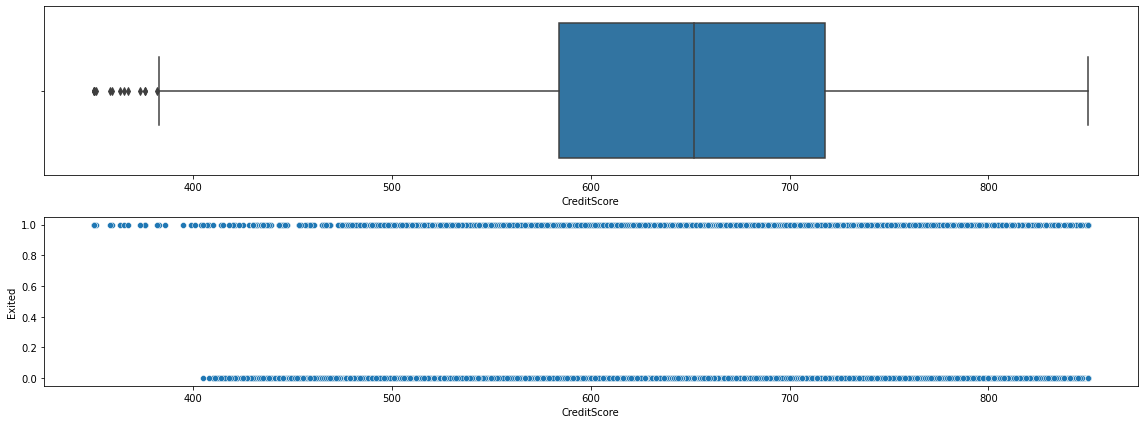

In [16]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


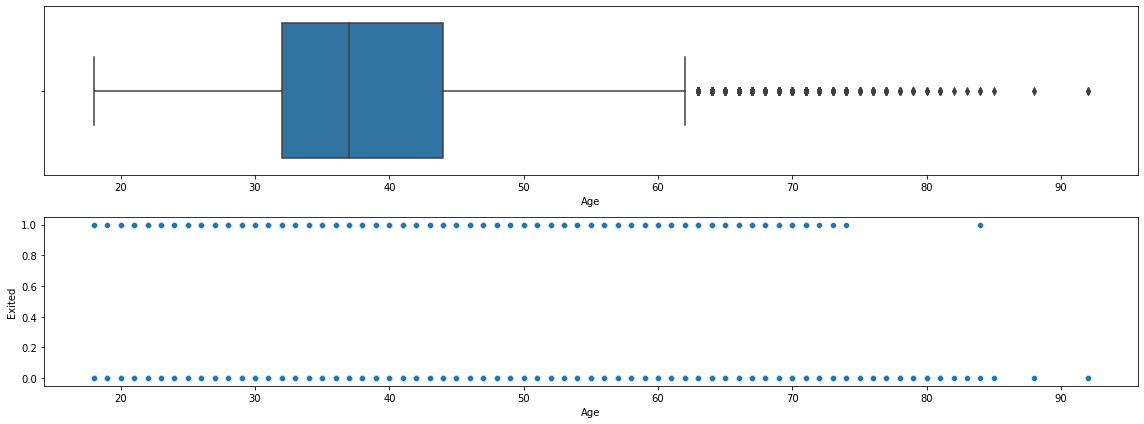

In [17]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


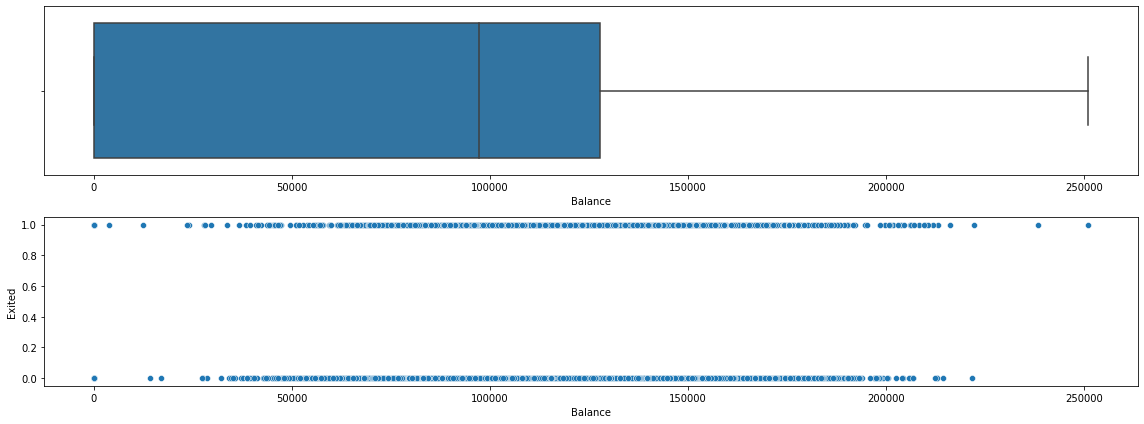

In [18]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

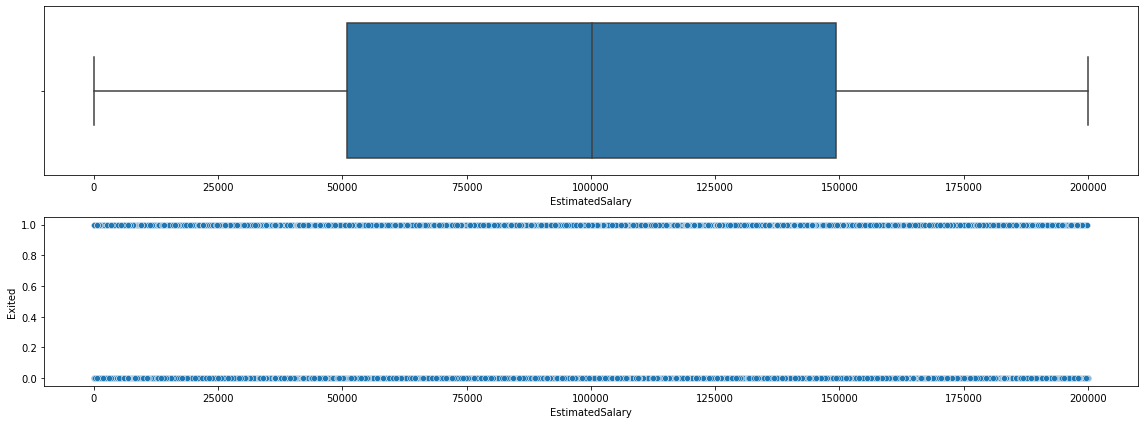

In [19]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()

In [20]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

# of Bivariate Outliers: 19


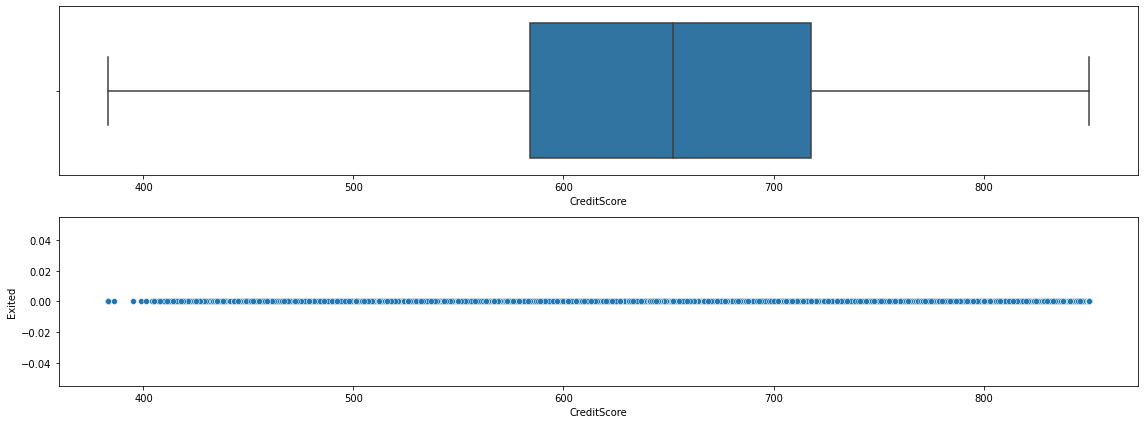

In [21]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 0


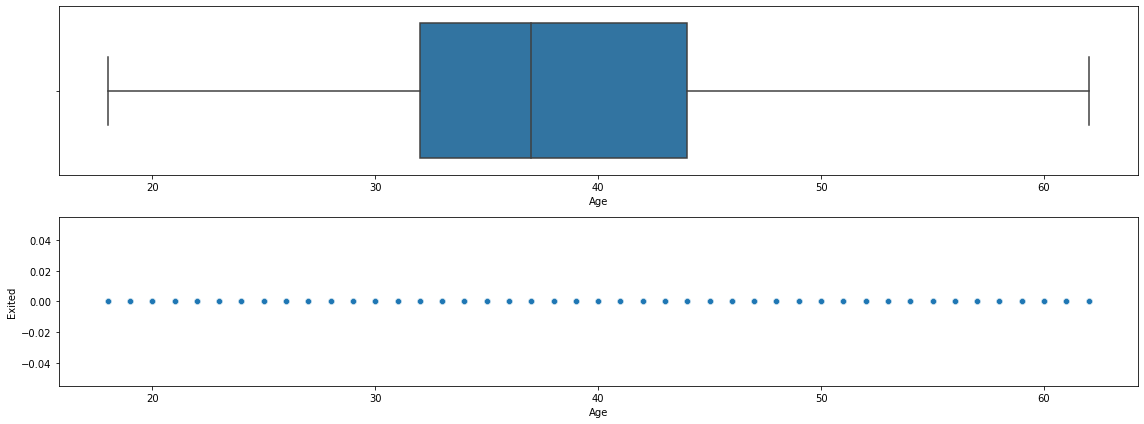

In [22]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


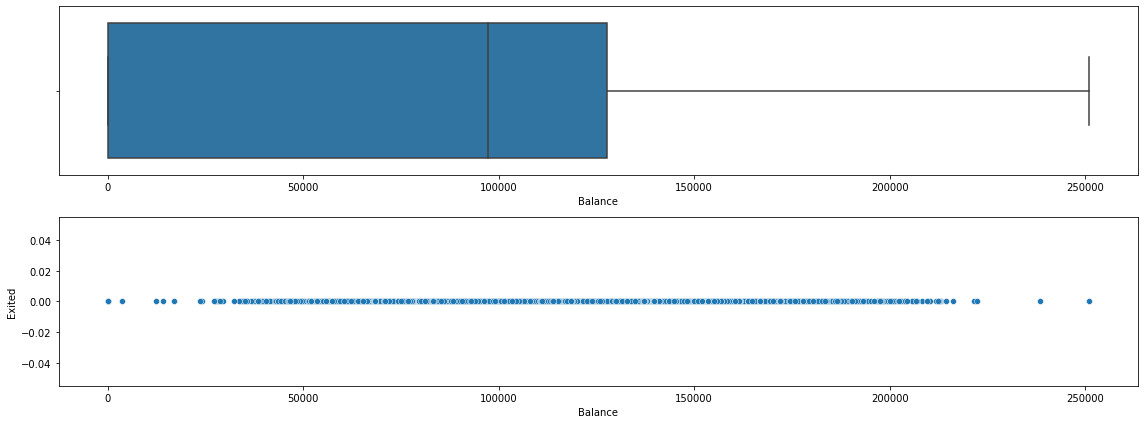

In [23]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=encoder.fit_transform(df[i])

In [25]:
x=df.iloc[:,:-1]
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,15634602.0,1115,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,2.0,15647311.0,1177,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,3.0,15619304.0,2040,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,4.0,15701354.0,289,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,5.0,15737888.0,1822,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)



NameError: ignored

In [27]:
x

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [34]:
from sklearn.model_selection import train_test_split
x_train=train_test_split(x,test_size=0.33)

In [38]:
x_train

[array([[-1.43950743,  1.61321081,  0.41980826, ...,  0.64609167,
         -1.03067011, -0.1340558 ],
        [ 0.31644568, -0.71470484, -1.36471999, ...,  0.64609167,
          0.97024255,  1.18599993],
        [-0.66493431,  0.04653566, -1.27135726, ...,  0.64609167,
         -1.03067011,  1.22715535],
        ...,
        [ 0.12557368,  1.23788719,  0.07590249, ...,  0.64609167,
          0.97024255, -1.26458847],
        [-0.94656577, -0.33528015,  0.47298957, ...,  0.64609167,
         -1.03067011,  1.68909937],
        [-0.9202386 ,  1.04210666, -0.60363642, ...,  0.64609167,
          0.97024255,  0.61856032]]),
 array([[ 0.47440872,  0.3241845 , -1.28317533, ..., -1.54776799,
         -1.03067011,  1.3678621 ],
        [-0.92855244, -0.1319926 ,  1.23052772, ...,  0.64609167,
          0.97024255,  0.92935567],
        [ 0.01991858, -1.17546957,  1.48225257, ...,  0.64609167,
         -1.03067011,  1.03441097],
        ...,
        [ 0.75846505,  0.15214843,  1.3652537 , ..., -

In [42]:
x_test


array([[ 0.99159909,  1.67382312, -1.27726629, ...,  0.64609167,
         0.97024255, -0.63112717],
       [ 0.39438797,  0.37595519,  0.0959932 , ...,  0.64609167,
        -1.03067011, -0.67425624],
       [-1.38893155,  0.75885536, -1.34344747, ...,  0.64609167,
        -1.03067011, -0.5890717 ],
       ...,
       [-1.41872282,  1.44078549, -1.26544822, ..., -1.54776799,
        -1.03067011,  1.32707481],
       [ 1.01792626,  1.61768722,  1.49643425, ..., -1.54776799,
        -1.03067011,  1.15741328],
       [ 1.42218693, -0.07596792,  1.35934466, ..., -1.54776799,
         0.97024255, -0.87432522]])

In [43]:
x_test.shape

(3300, 13)